In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1) Alcohol
2) Malic acid
3) Ash
4) Alcalinity of ash  
5) Magnesium
6) Total phenols
7) Flavanoids
8) Nonflavanoid phenols
9) Proanthocyanins
10) Color intensity
11) Hue
12) OD280/OD315 of diluted wines
13) Proline            

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/haram4th/ADsP/main/wine.csv", header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


<Axes: >

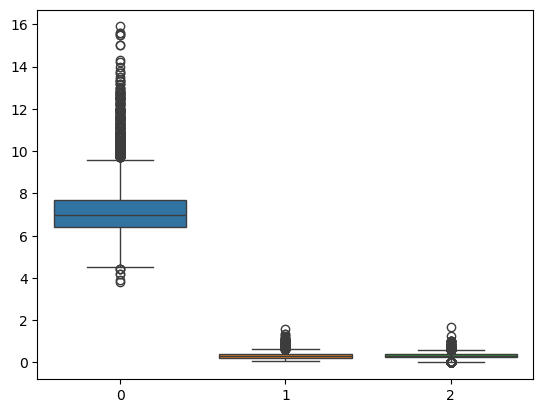

In [7]:
sns.boxplot(data.iloc[:,0:3])

In [8]:
data[12].value_counts()

12
0    4898
1    1599
Name: count, dtype: int64

In [10]:
X = data.drop(12, axis=1)
y = data[12]

In [11]:
from sklearn.preprocessing import RobustScaler

In [12]:
rs = RobustScaler()
X_scaled = rs.fit_transform(X)
X_scaled

array([[ 0.30769231,  2.41176471, -2.21428571, ...,  0.29411765,
        -0.5       , -1.        ],
       [ 0.61538462,  3.47058824, -2.21428571, ...,  1.        ,
        -0.27777778, -1.        ],
       [ 0.61538462,  2.76470588, -1.92857143, ...,  0.82352941,
        -0.27777778, -1.        ],
       ...,
       [-0.38461538, -0.29411765, -0.85714286, ..., -0.29411765,
        -0.5       ,  0.        ],
       [-1.15384615,  0.        , -0.07142857, ..., -0.76470588,
         1.38888889,  1.        ],
       [-0.76923077, -0.47058824,  0.5       , ..., -1.11764706,
         0.83333333,  0.        ]])

In [13]:
y

0       1
1       1
2       1
3       1
4       1
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: 12, Length: 6497, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X_scaled, y, test_size=0.4, stratify=y, random_state=10)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size=0.5, stratify=y_valid, random_state=10)

In [28]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from sklearn.metrics import classification_report

In [25]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 32)                416       
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 8)                 136       
                                                                 
 dense_4 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1,089
Trainable params: 1,089
Non-trainable params: 0
_________________________________________________________________


In [26]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=500, validation_data=(X_valid, y_valid))

Epoch 1/100


2024-09-10 10:38:52.618198: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 10:38:52.707057: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 10:38:52.707286: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 1s 59ms/step - loss: 0.6195 - accuracy: 0.7532 - val_loss: 0.5754 - val_accuracy: 0.7814
Epoch 2/100
8/8 [==============================] - ETA: 0s - loss: 0.5342 - accuracy: 0.7999

2024-09-10 10:38:53.210930: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2024-09-10 10:38:53.243058: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-09-10 10:38:53.243123: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 15603 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


8/8 [==============================] - 0s 25ms/step - loss: 0.5342 - accuracy: 0.7999 - val_loss: 0.4953 - val_accuracy: 0.8406
Epoch 3/100
8/8 [==============================] - 0s 27ms/step - loss: 0.4563 - accuracy: 0.8697 - val_loss: 0.4199 - val_accuracy: 0.9038
Epoch 4/100
8/8 [==============================] - 0s 23ms/step - loss: 0.3837 - accuracy: 0.9271 - val_loss: 0.3506 - val_accuracy: 0.9461
Epoch 5/100
8/8 [==============================] - 0s 23ms/step - loss: 0.3174 - accuracy: 0.9605 - val_loss: 0.2882 - val_accuracy: 0.9723
Epoch 6/100
8/8 [==============================] - 0s 24ms/step - loss: 0.2585 - accuracy: 0.9746 - val_loss: 0.2341 - val_accuracy: 0.9792
Epoch 7/100
8/8 [==============================] - 0s 26ms/step - loss: 0.2074 - accuracy: 0.9805 - val_loss: 0.1891 - val_accuracy: 0.9838
Epoch 8/100
8/8 [==============================] - 0s 25ms/step - loss: 0.1660 - accuracy: 0.9831 - val_loss: 0.1528 - val_accuracy: 0.9861
Epoch 9/100
8/8 [===============

8/8 [==============================] - 0s 28ms/step - loss: 0.0150 - accuracy: 0.9969 - val_loss: 0.0315 - val_accuracy: 0.9946
Epoch 61/100
8/8 [==============================] - 0s 37ms/step - loss: 0.0148 - accuracy: 0.9969 - val_loss: 0.0314 - val_accuracy: 0.9946
Epoch 62/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0146 - accuracy: 0.9972 - val_loss: 0.0312 - val_accuracy: 0.9946
Epoch 63/100
8/8 [==============================] - 0s 36ms/step - loss: 0.0144 - accuracy: 0.9972 - val_loss: 0.0310 - val_accuracy: 0.9954
Epoch 64/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0143 - accuracy: 0.9969 - val_loss: 0.0314 - val_accuracy: 0.9946
Epoch 65/100
8/8 [==============================] - 0s 35ms/step - loss: 0.0140 - accuracy: 0.9972 - val_loss: 0.0310 - val_accuracy: 0.9954
Epoch 66/100
8/8 [==============================] - 0s 24ms/step - loss: 0.0138 - accuracy: 0.9974 - val_loss: 0.0308 - val_accuracy: 0.9954
Epoch 67/100
8/8 [========

In [29]:
pred = model.predict(X_test)
pred = pd.DataFrame(pred)
pred = pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, pred))

41/41 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.98      0.99       320

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



In [30]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

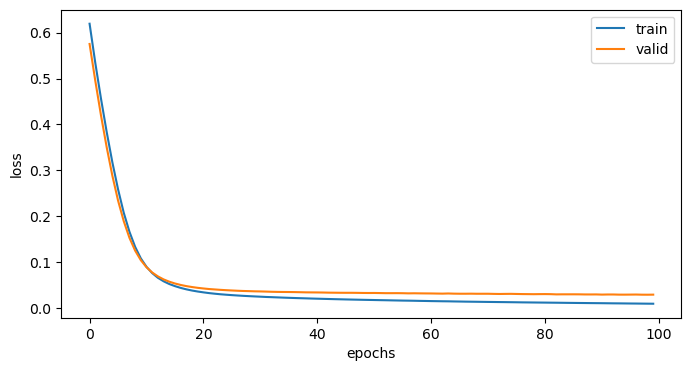

In [32]:
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend(['train', 'valid'])
plt.show()

# EarlyStopping으로 학습 조기 중단 및 저장하기

In [34]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [41]:
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=50)

# ModelCheckpoint
* 모델을 중간에 저장하는 옵션

In [45]:
import os
if not os.path.exists("./model"):
    os.makedirs("./model")
    print(f"Directory /model created.")
else:
    print(f"Directory /model already exists.")

Directory /model already exists.


In [46]:
modelpath = "./model/{epoch:03d}--{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only=True)

In [47]:
history = model.fit(X_train, y_train, epochs=1000, batch_size=500, validation_data=(X_valid, y_valid), 
                   callbacks=[early_stopping_callback, checkpointer])

Epoch 1/1000
8/8 [==============================] - 0s 44ms/step - loss: 0.0017 - accuracy: 0.9990 - val_loss: 0.0356 - val_accuracy: 0.9962
Epoch 2/1000
8/8 [==============================] - 0s 27ms/step - loss: 0.0017 - accuracy: 0.9987 - val_loss: 0.0357 - val_accuracy: 0.9962
Epoch 3/1000
8/8 [==============================] - 0s 27ms/step - loss: 0.0017 - accuracy: 0.9987 - val_loss: 0.0357 - val_accuracy: 0.9962
Epoch 4/1000
8/8 [==============================] - 0s 29ms/step - loss: 0.0017 - accuracy: 0.9990 - val_loss: 0.0360 - val_accuracy: 0.9962
Epoch 5/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0017 - accuracy: 0.9990 - val_loss: 0.0359 - val_accuracy: 0.9962
Epoch 6/1000
8/8 [==============================] - 0s 24ms/step - loss: 0.0016 - accuracy: 0.9990 - val_loss: 0.0360 - val_accuracy: 0.9962
Epoch 7/1000
8/8 [==============================] - 0s 25ms/step - loss: 0.0016 - accuracy: 0.9990 - val_loss: 0.0361 - val_accuracy: 0.9962
Epoch 8/1000


# 저장된 베스트 모델을 불러와서 테스트 하기

In [48]:
from tensorflow.keras.models import load_model

In [49]:
best_model = load_model("./model/001--0.0356.keras")  # .h5

In [50]:
best_pred = best_model.predict(X_test)
best_pred = pd.DataFrame(best_pred)
best_pred = best_pred[0].apply(lambda x: 1 if x > 0.5 else 0)
print(classification_report(y_test, best_pred))

34/41 [=======================>......] - ETA: 0s

2024-09-10 11:32:03.837489: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


41/41 [==============================] - 0s 5ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       1.00      0.98      0.99       320

    accuracy                           1.00      1300
   macro avg       1.00      0.99      0.99      1300
weighted avg       1.00      1.00      1.00      1300



In [18]:
wine = pd.read_csv("../06machine_learning/data/winequality-white.csv", sep=";")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [19]:
wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64